## Movie Exploratory Data Anaylsis 
<i>Donnell Jackson</i>

<div>
    <div style="border:0.2px; border-style:solid; border-color:#1C6EA4; padding: 1em;font-size:15px;border-width:medium;display:inline-block; margin-left:50px;">
     <h2> Questions</h2> 
           <ul>
        <li>Question 1: what movies are most popular?
        <li>Question 2: what movie kind of movies are most succesful?
        <li>Question 3: What kind of movies produce the most revenue? 
</ul>
   </div>
</div>

<p style="border:0.2px; border-style:solid; border-color:#1C6EA4; padding: 0.5em;font-size:15px; text-align:center; border-width:medium;">
    <b>Collection & Wrangling</b>
</p>

In [59]:
# importing necessary libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

In [60]:
# creating Dataframes for data 
title_baiscs = pd.read_csv("zippedData/imdb.title.basics.csv.gz")
ratings = pd.read_csv("zippedData/imdb.title.ratings.csv.gz")
budget = pd.read_csv("zippedData/tn.movie_budgets.csv.gz")

In [942]:
#previewing dataframe
title_baiscs.head(2)

,primary_title,original_title,start_year,runtime_minutes,genres
tconst,,,,,
tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"


<center><p style="border:0.2px; border-style:solid; border-color:#A9A9A9; padding:0.5em;font-size:14px;border-width:medium; display:inline-block;">  
Duplicate Check
 </p></center>

In [62]:
#checking for duplicates
title_baiscs.drop(index =title_baiscs[title_baiscs.duplicated(subset="primary_title")].index, inplace=True)

In [63]:
len(title_baiscs)

136071

In [64]:
title_baiscs.head(1)

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"


In [65]:
ratings.head(1)

,tconst,averagerating,numvotes
0,tt10356526,8.3,31


In [66]:
ratings[ratings.duplicated(subset="tconst")]

,tconst,averagerating,numvotes


In [67]:
# get overview of data 
print(len(ratings))
print(len(title_baiscs))

73856
136071


<center><p style="border:0.2px; border-style:solid; border-color:#A9A9A9; padding:0.5em;font-size:14px;border-width:medium; display:inline-block;">  
Joining Tables
 </p></center>

In [68]:
title_baiscs.set_index("tconst", inplace=True) #setting index for tables to be joined with 
ratings.set_index("tconst",inplace=True)

In [128]:
movie_frame = title_baiscs.join(ratings, on="tconst", how="left")
len(m_df)

136071

In [129]:
movie_frame.head()# reviewing table join

,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
tconst,,,,,,,
tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77.0
tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43.0
tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517.0
tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13.0
tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119.0


In [130]:
movie_frame.rename(columns={"primary_title":"title"}, inplace=True) #renaming column for more intuitve use and matching when joining

In [72]:
budget.head(1)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"


In [73]:
budget.rename(columns={"movie":"title"},inplace=True)# renaming column

In [74]:
budget.set_index("title", inplace=True)# setting index to join 

In [75]:
budget.head(1)# reviewing dataframe 

,id,release_date,production_budget,domestic_gross,worldwide_gross
title,,,,,
Avatar,1,"Dec 18, 2009","$425,000,000","$760,507,625","$2,776,345,279"


In [131]:
movie_frame.set_index("title", inplace=True) # setting index for table joining 

In [132]:
movie_frame.head(1) #reviewing change 

,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
title,,,,,,
Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77.0


In [133]:
movie_frame = movie_frame.join(budget, on="title", how="left")#joing budget data frame 

In [135]:
movie_frame.head(1) #reviewing change 

,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,id,release_date,production_budget,domestic_gross,worldwide_gross
title,,,,,,,,,,,
Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77.0,NaN,NaN,NaN,NaN,NaN


In [139]:
movie_frame.reset_index(inplace=True)# resetting index so title column can be used more flexibly and independently 

In [140]:
print(len(movie_frame))
len(movie_frame) - len(movie_frame[movie_frame.duplicated(subset="title")])

136135


136071

In [83]:
movie_frame.drop(m_df2[m_df2.duplicated(subset="title")].index,inplace=True) # removing duplicates 

In [84]:
len(movie_frame) # ensuring accuracy 

136071

<p style="border:0.2px; border-style:solid; border-color:#1C6EA4; padding: 0.5em;font-size:15px; text-align:center;border-width:medium">
    <b>Cleaning & Tranformation</b>
</p>

In [85]:
# creating function that will help highlight data that can be interpreted as outliers 
def outliers(data):
    sorted(data)
    Q1,Q3 = np.percentile(data,[25,75])
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range,upper_range

need to split into 2 frames to get proer description view 
create cash to number function 

<center><p style="border:0.2px; border-style:solid; border-color:#A9A9A9; padding:0.5em;font-size:14px;border-width:medium; display:inline-block;">  
Currency Columns
 </p></center>

In [141]:
# budget table column checks
print(len(movie_frame[movie_frame["production_budget"].notna()]))
print(len(movie_frame[movie_frame["domestic_gross"].notna()]))
print(len(movie_frame[movie_frame["worldwide_gross"].notna()]))

2376
2376
2376


In [142]:
#transforming currency columns from strings with symbols  to floats with decimals 
movie_frame["production_budget"] = movie_frame["production_budget"].str.replace("$","").str.replace(",","").astype('float')
movie_frame["domestic_gross"] = movie_frame["domestic_gross"].str.replace("$","").str.replace(",","").astype('float')
movie_frame["worldwide_gross"] = movie_frame["worldwide_gross"].str.replace("$","").str.replace(",","").astype('float')

In [143]:
movie_frame.describe() # getting overview and glance at data metrics which will help highlight areas that need to be addressed 

,start_year,runtime_minutes,averagerating,numvotes,id,production_budget,domestic_gross,worldwide_gross
count,136135.000000,106656.000000,68880.000000,6.888000e+04,2376.000000,2.376000e+03,2.376000e+03,2.376000e+03
mean,2014.561046,86.195235,6.339078,3.623455e+03,50.537879,3.588168e+07,4.543016e+07,1.087072e+08
std,2.732804,172.065777,1.479817,3.134734e+04,28.613185,4.946435e+07,7.655608e+07,2.107494e+08
min,2010.000000,1.000000,1.000000,5.000000e+00,1.000000,1.400000e+03,0.000000e+00,0.000000e+00
25%,2012.000000,70.000000,5.500000,1.400000e+01,26.000000,5.000000e+06,6.680778e+05,2.476599e+06
50%,2015.000000,86.000000,6.500000,4.800000e+01,50.000000,1.800000e+07,1.841924e+07,3.117624e+07
75%,2017.000000,99.000000,7.400000,2.760000e+02,75.000000,4.300000e+07,5.503920e+07,1.099793e+08
max,2027.000000,51420.000000,10.000000,1.841066e+06,100.000000,4.250000e+08,7.605076e+08,2.776345e+09


In [144]:
movie_frame.head()

,title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,id,release_date,production_budget,domestic_gross,worldwide_gross
0,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77.0,NaN,NaN,NaN,NaN,NaN
1,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43.0,NaN,NaN,NaN,NaN,NaN
2,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517.0,NaN,NaN,NaN,NaN,NaN
3,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13.0,NaN,NaN,NaN,NaN,NaN
4,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119.0,NaN,NaN,NaN,NaN,NaN


<center><p style="border:0.2px; border-style:solid; border-color:#A9A9A9; padding:0.5em;font-size:14px;border-width:medium; display:inline-block;">  
Runtime
 </p></center>

In [145]:
#creatinf a runtime in hours format to gain further insight into movie runtimes
movie_frame["hours"] = round(movie_frame["runtime_minutes"]/60,1)

In [146]:
#reviewing hours format agaisnt original minutes format and how it can be interpreted to gain insight 
movie_frame[["runtime_minutes","hours"]].describe()

,runtime_minutes,hours
count,106656.000000,106656.000000
mean,86.195235,1.437183
std,172.065777,2.867825
min,1.000000,0.000000
25%,70.000000,1.200000
50%,86.000000,1.400000
75%,99.000000,1.600000
max,51420.000000,857.000000


In [147]:
len(movie_frame["hours"][movie_frame["hours"].notna()])

106656

In [148]:
movie_frame.drop(movie_frame[(movie_frame["runtime_minutes"]< 45) | (movie_frame["runtime_minutes"]>300)].index, inplace=True)

<p style="border:0.2px; border-style:solid; border-color:#A9A9A9; padding: 0.5em;font-size:14px;border-width:medium; text-align:center;">  
    Movie Runtimes Insight
 </p>

In [94]:
run_norm = movie_frame["runtime_minutes"][movie_frame["runtime_minutes"].notna()]

In [149]:
outliers(movie_frame["hours"][movie_frame["hours"].notna()])

(0.44999999999999996, 2.45)

In [151]:
movie_frame.runtime_minutes.min()

45.0

In [97]:
outliers(run_norm)

(32.5, 140.5)

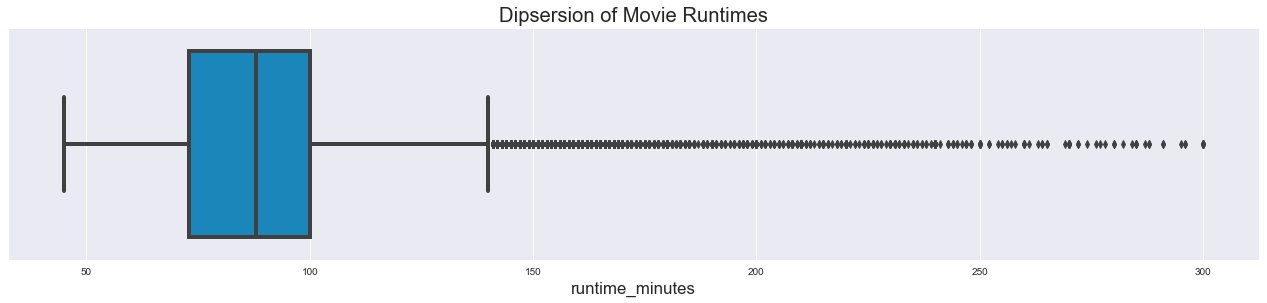

In [927]:
sns.set_style("darkgrid")
plt.figure(figsize=(20,4))
plt.title("Dipsersion of Movie Runtimes")
sns.boxplot(run_norm)

<p style="border:0.2px; border-style:solid; border-color:#A9A9A9; padding: 0.5em;font-size:14px;border-width:medium; text-align:center;">  
Based on our outlier funciton, technically the outliers for runtime are considered to be any movies less than 26.5 minutes and more than 142.5 miutes, 
however this is based on the skew of the current data set.<br>Traditionally speaking, movies lengths are generally a minimum of 50 minutes. Going forward we
will try omitting movies less than 45minuts and more than 180 minutes(3 hours) in runtime.<br>
 </p>

<center><p style="border:0.2px; border-style:solid; border-color:#A9A9A9; padding:0.5em;font-size:14px;border-width:medium; display:inline-block;">  
Revenue
 </p></center>

In [604]:
rev_data = movie_frame[["title","production_budget","domestic_gross","worldwide_gross"]][movie_frame["domestic_gross"].notna()]
rev_data.head()

,title,production_budget,domestic_gross,worldwide_gross
20,Foodfight!,45000000.0,0.0,73706.0
33,Mortal Kombat,20000000.0,70433227.0,122133227.0
40,The Overnight,200000.0,1109808.0,1165996.0
48,On the Road,25000000.0,720828.0,9313302.0
54,The Secret Life of Walter Mitty,91000000.0,58236838.0,187861183.0


In [541]:
#Evaulating how much data we have to work with in columns related to revenue 
movie_frame.count()[["production_budget","domestic_gross","worldwide_gross"]]

production_budget    2315
domestic_gross       2315
worldwide_gross      2315
dtype: int64

In [659]:
# percentage of usable revenue rows vs total dataset 
round((len(rev_data)/len(movie_frame))*100,2)

1.81

<p style="border:0.2px; border-style:solid; border-color:#A9A9A9; padding: 0.5em;font-size:14px;border-width:medium;">  
Less than 2% of our movie data has usable revenue information. To this end there is not sufficient data to derive an appropriate analysis for movie revenues.<br> 
However we can take a look to gain what insight we can. 
</p>

<p>
</p>

<p style="border:0.2px; border-style:solid; border-color:#A9A9A9; padding: 0.5em;font-size:14px;border-width:medium; text-align:center;">  
Movie Revenue Insight
 </p>

Text(0.5, 0, 'Worldwide Gross in Billions')

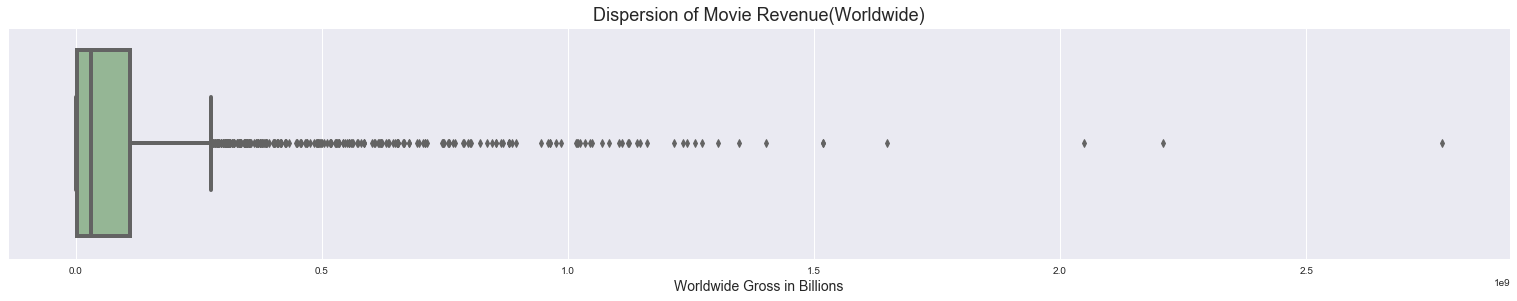

In [940]:
sns.set_style("darkgrid")
plt.figure(figsize=(24,4))
plt.title("Dispersion of Movie Revenue(Worldwide)", fontdict={"size":18})
sns.boxplot(rev_data["worldwide_gross"], color="darkseagreen");
plt.xlabel("Worldwide Gross in Billions", fontdict={"size":14})

In [712]:
print(outliers(rev_data["production_budget"]))
print(outliers(rev_data["domestic_gross"]))
print(outliers(rev_data["worldwide_gross"]))

(-53500000.0, 102500000.0)
(-81853199.75, 138199246.25)
(-161112474.5, 275175389.5)


<p style="border:0.2px; border-style:solid; border-color:#A9A9A9; padding: 0.5em;font-size:14px;border-width:medium;">  
Since our initial outliers for "worldwide" revenue are anything beyond 2751753890 (275175389.5 rounded), we will try a more "zoomed in" or focused boxplot.
 </p>

Text(0.5, 0, 'Worldwide Gross in Billions')

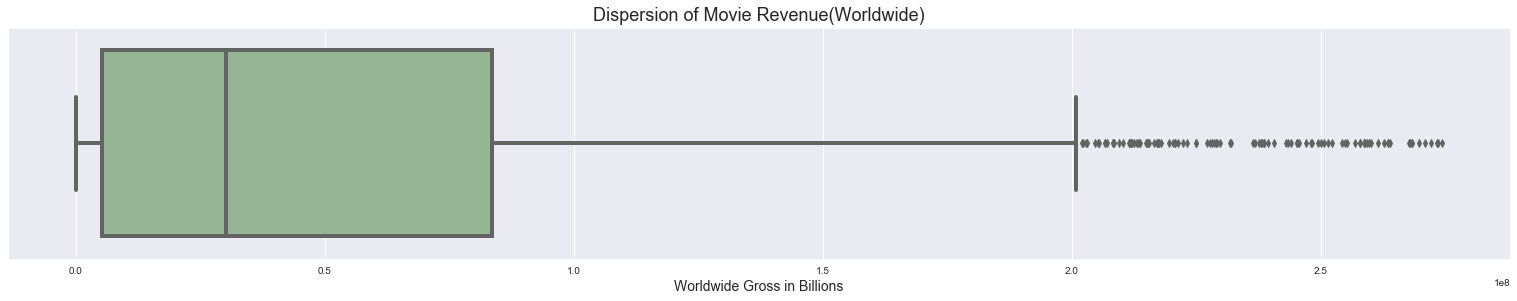

In [941]:
sns.set_style("darkgrid")
plt.figure(figsize=(24,4))
plt.title("Dispersion of Movie Revenue(Worldwide)", fontdict={"size":18})
sns.boxplot(rev_data[(rev_data["worldwide_gross"] > 0) & (rev_data["worldwide_gross"] < 275175389)]["worldwide_gross"], color="darkseagreen");
plt.xlabel("Worldwide Gross in Billions", fontdict={"size":14})

<p style="border:0.2px; border-style:solid; border-color:#A9A9A9; padding: 0.5em;font-size:14px;border-width:medium;">  
Our boxplots a majority of "world wide" revenues are less than 1 Billion.<br>
 </p>

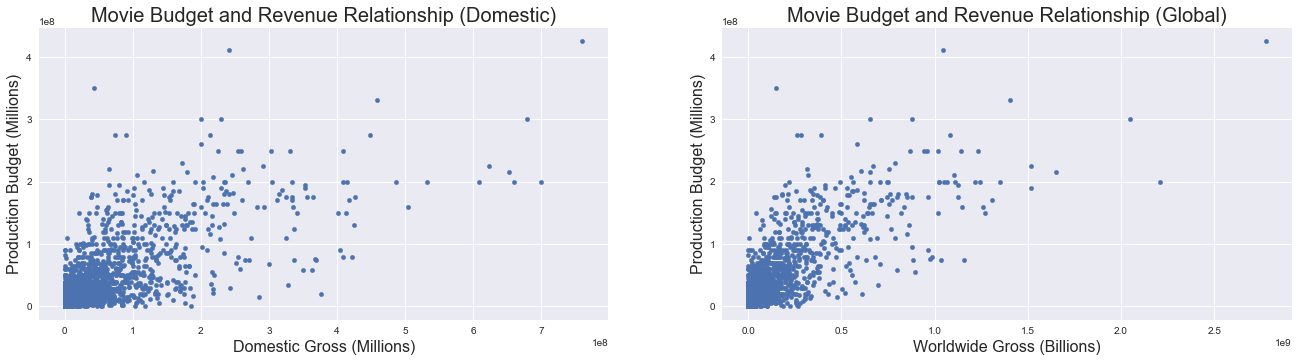

In [719]:
fig, axes = plt.subplots(1,2,figsize=(20,5))
ax = axes[0]
ax2 = axes[1]

rev_data.plot(kind="scatter", x="domestic_gross", y="production_budget", ax=ax)
ax.set_xlabel("Domestic Gross (Millions)", fontdict = {"size":16})
ax.set_ylabel("Production Budget (Millions)",fontdict = {"size":16})
ax.set_title("Movie Budget and Revenue Relationship (Domestic)", fontdict = {"size":20})

rev_data.plot(kind="scatter", x="worldwide_gross", y="production_budget", ax=ax2)
ax2.set_xlabel("Worldwide Gross (Billions)",fontdict = {"size":16})
ax2.set_ylabel("Production Budget (Millions)", fontdict = {"size":16})
ax2.set_title("Movie Budget and Revenue Relationship (Global)", fontdict = {"size":20})
plt.show()

<p style="border:0.2px; border-style:solid; border-color:#A9A9A9; padding: 0.5em;font-size:14px;border-width:medium;">  
The scatter plot visualizations shows that there is some relationship between a movies budget and revunue. The visulations also show that a majority of reveue is within the 0.5 Billion range.<br>
 </p>

<p>
</p>

<center><p style="border:0.2px; border-style:solid; border-color:#A9A9A9; padding:0.5em;font-size:14px;border-width:medium; display:inline-block;">  
Movie Genre
 </p></center>

In [154]:
# some movies have missing genres, and other missing data. While others only have missing genres. we will try to work around those only with missing genres so they can perhaps be used in later anaylisis 
print(len( movie_frame[(movie_frame["genres"].isna()) & (movie_frame["runtime_minutes"].isna())]))
print(len(movie_frame[(movie_frame["genres"].isna()) & (movie_frame["averagerating"].isna())]))

2877
4117


In [160]:
movie_frame["genres"].fillna("x", inplace=True)

In [161]:
movie_frame["prime_genre"] = movie_frame["genres"].map(lambda x: x.split(","))
movie_frame["prime_genre"] = movie_frame["prime_genre"].map(lambda x: x[0])

In [162]:
movie_frame["prime_genre"].replace("x",np.nan, inplace=True)

In [163]:
movie_frame[movie_frame["prime_genre"] =="x"]

,title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,id,release_date,production_budget,domestic_gross,worldwide_gross,hours,prime_genre


In [164]:
for i in enumerate(movie_frame["prime_genre"].unique()):
    print(i, end=",")

(0, 'Action'),(1, 'Biography'),(2, 'Drama'),(3, 'Comedy'),(4, 'Horror'),(5, 'Adventure'),(6, 'Documentary'),(7, 'History'),(8, 'Animation'),(9, nan),(10, 'Crime'),(11, 'Sci-Fi'),(12, 'Thriller'),(13, 'Fantasy'),(14, 'Mystery'),(15, 'Musical'),(16, 'Family'),(17, 'Western'),(18, 'Romance'),(19, 'Sport'),(20, 'Adult'),(21, 'Music'),(22, 'News'),(23, 'Talk-Show'),(24, 'Reality-TV'),(25, 'War'),(26, 'Game-Show'),

In [174]:
# not essential movie genres 
print(movie_frame["prime_genre"].unique()[26])
print(movie_frame["prime_genre"].unique()[24])
print(movie_frame["prime_genre"].unique()[23])
print(movie_frame["prime_genre"].unique()[22])

Game-Show
Reality-TV
Talk-Show
News


In [183]:
list(range(len(gen_drop)))

[0, 1, 2, 3]

In [184]:
#dropping movie genres
gen_drop = ["Game-Show","Reality-TV","Talk-Show","News"]
for i in list(range(len(gen_drop))):
    movie_frame.drop(movie_frame[movie_frame["prime_genre"]== gen_drop[i]].index, inplace=True)

In [1118]:
# Music and Musical genres are similiar categories, therefore will be combined into one 
movie_frame["prime_genre"].replace("Music","Musical",inplace=True)

In [1120]:
# ensuring genre change 
movie_frame[movie_frame["prime_genre"]=="Music"]

,title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,id,release_date,production_budget,domestic_gross,worldwide_gross,hours,prime_genre


<p style="border:0.2px; border-style:solid; border-color:#A9A9A9; padding: 0.5em;font-size:14px;border-width:medium; text-align:center;">  
Movie Genre Insight
 </p>

In [187]:
# top 10/most common Movie Genres for 2010-2018
movie_frame["prime_genre"].value_counts()[0:10]

Documentary    36044
Drama          28142
Comedy         20221
Action          9450
Biography       6595
Horror          6027
Adventure       4225
Crime           3483
Animation       1683
Romance         1428
Name: prime_genre, dtype: int64

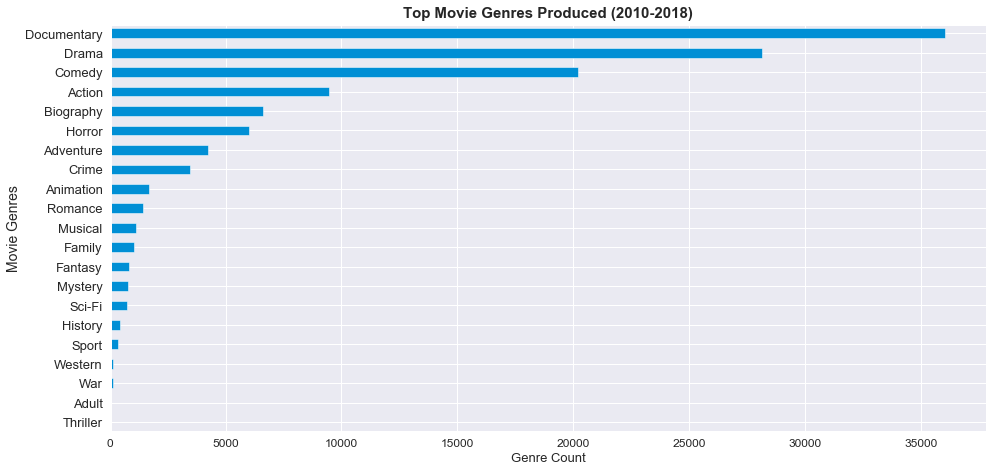

In [1121]:
sns.set_style("darkgrid") # setting chart style 

plt.figure(figsize=(14,7)) #creating plot figure 
movie_frame.groupby("prime_genre").count()["title"].sort_values(ascending=True).plot(kind="barh") #plotting grouped dataframe
plt.title("Top Movie Genres Produced (2010-2018)",fontdict={"size":15},fontweight="bold") #defining title and fotn styles
plt.xlabel("Genre Count",fontdict={"size":13}) #defining x-axis label
plt.ylabel("Movie Genres",fontdict={"size":14}) #defining y-axis label
plt.xticks(fontsize=12)
plt.yticks(fontsize=13);

<div style="border:0.2px; border-style:solid; border-color:#A9A9A9; padding: 0.5em;font-size:14px;border-width:medium;">
<p>  
According to our data the top ranking movie genre is respect to qaunty is Documentary(36040).<br> 
The remaing top 5 quanittiy of genres are the following that is: <br></p>
    <ul>
        <li>Drama (28128)
        <li>Comedy (20219)
        <li>Action (9427)
        <li>Biography (6593)
    </ul>
<p>
Based on our data the remaining genre's quanitites far trail behind the or top 3.
</div>

<p style="border:0.2px; border-style:solid; border-color:#1C6EA4; padding: 0.5em;font-size:15px; text-align:center;border-width:medium">
    <b>Clean</b>
</p>

<center><p style="border:0.2px; border-style:solid; border-color:#A9A9A9; padding:0.5em;font-size:14px;border-width:medium; display:inline-block;">  
Dates
 </p></center>

In [1155]:
# copying dataframe and renaming as a safegaurd for previous steps 
df_movie = movie_frame.copy()

In [1156]:
df_movie.rename(columns={"start_year":"year"}, inplace=True) #renaming colum for more intuitive use 

In [1157]:
df_movie.head()

,title,original_title,year,runtime_minutes,genres,averagerating,numvotes,id,release_date,production_budget,domestic_gross,worldwide_gross,hours,prime_genre
0,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77.0,NaN,NaN,NaN,NaN,NaN,2.9,Action
1,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43.0,NaN,NaN,NaN,NaN,NaN,1.9,Biography
2,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517.0,NaN,NaN,NaN,NaN,NaN,2.0,Drama
3,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13.0,NaN,NaN,NaN,NaN,NaN,NaN,Comedy
4,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119.0,NaN,NaN,NaN,NaN,NaN,1.3,Comedy


In [1158]:
df_movie.year.value_counts()# reviewing move time-frames by year 

2017    14763
2016    14629
2018    14227
2015    13914
2014    13644
2013    13032
2012    12474
2011    11857
2010    11043
2019     7309
2020      830
2021       76
2022       21
2023        4
2025        1
2024        1
2027        1
Name: year, dtype: int64

In [1159]:
df_movie[(df_movie["year"]>= 2010) & (df_movie["year"]<=2018)].count() #reviewing overall data for timeframe of movies we want to use 

title                119583
original_title       119569
year                 119583
runtime_minutes       95393
genres               119583
averagerating         65173
numvotes              65173
id                     2206
release_date           2206
production_budget      2206
domestic_gross         2206
worldwide_gross        2206
hours                 95393
prime_genre          115044
dtype: int64

In [1160]:
len(df_movie[(df_movie["year"]<2010) | (df_movie["year"]>2018)]) # ammount of rows we will be omitting 

8243

In [1161]:
df_movie.drop(df_movie[(df_movie["year"]<2010) | (df_movie["year"]>2018)].index, inplace=True) #dropping rows 

<p style="border:0.2px; border-style:solid; border-color:#A9A9A9; padding: 0.5em;font-size:14px;border-width:medium; text-align:center;">  
Movie Count Insight
 </p>

In [1162]:
#iteration data for plotting and labeling 
y_point = []
for i in df_movie.groupby("year")["title"].count():
    y_point.append(i)
x_point = list(range(len(y_point)))
print(x_point)
print(y_point)

[0, 1, 2, 3, 4, 5, 6, 7, 8]
[11043, 11857, 12474, 13032, 13644, 13914, 14629, 14763, 14227]


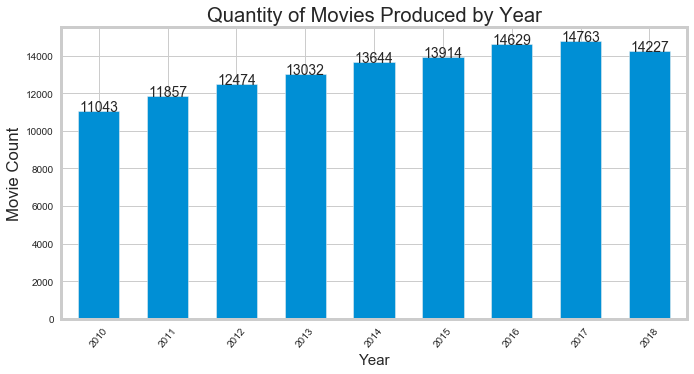

In [1163]:
fig, ax = plt.subplots(figsize=(10,5)) # setting figure 
plt.style.use('fivethirtyeight') #setting stlye 

df_movie.groupby("year")["title"].count().plot(kind="bar", width=0.6) #plotting group by 
plt.xlabel("Year", fontsize = 15) # setting x-axes label 
plt.ylabel("Movie Count")# setting y-axis label 
plt.title("Quantity of Movies Produced by Year") #setting title 
plt.xticks(rotation=50); #changing orientation of xticks 
for i in x_point:
    ax.annotate(y_point[i],(x_point[i],y_point[i]), ha="center") # adding labels to data 

<p style="border:0.2px; border-style:solid; border-color:#1C6EA4; padding: 0.5em;font-size:15px; text-align:center;border-width:medium">
    <b>Analysis & Visualization</b>
</p>

<center><p style="border:0.2px; border-style:solid; border-color:#A9A9A9; padding:0.5em;font-size:14px;border-width:medium; display:inline-block;">  
Average Ratings
 </p></center>

In [1164]:
# groupinf rating data into different formats for analysis
genre_total_ratings = df_movie.groupby("prime_genre")["averagerating"].mean().to_frame()
genre_total_ratings.reset_index(inplace=True)

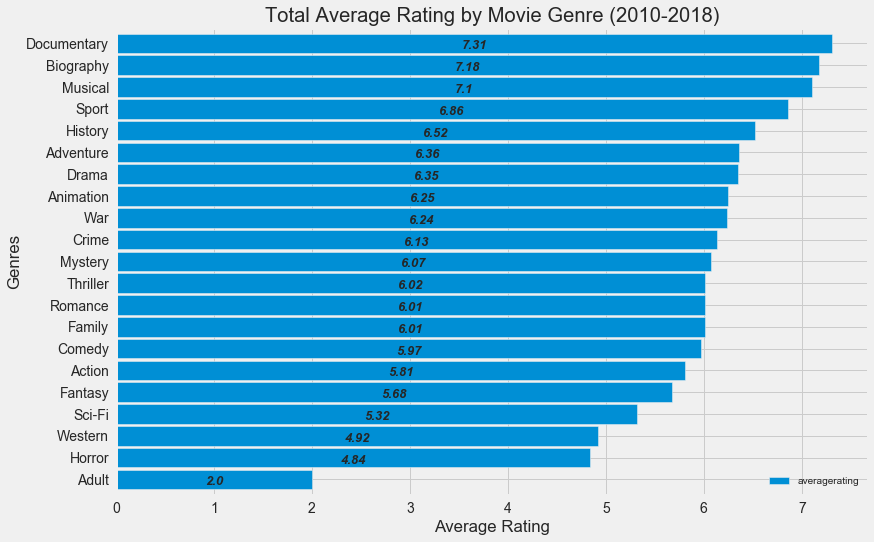

In [1166]:
plt.style.use('fivethirtyeight')
fig, axes = plt.subplots(figsize=(12,8))

genre_total_ratings.sort_values('averagerating').plot(kind="barh",x="prime_genre", y="averagerating", width=.9, ax=axes)
plt.title("Total Average Rating by Movie Genre (2010-2018)")
plt.ylabel("Genres")
plt.yticks()
plt.xlabel("Average Rating")
plt.tick_params(labelsize=14)
for i, x in enumerate(genre_total_ratings["averagerating"].sort_values().round(2)):
    axes.text(x/2, i-.275, x,fontdict={"size":13,"weight":"bold","style":"italic"}, ha="center") #adding label to data

In [1167]:
frame_prime = df_movie.groupby(["prime_genre","year"])["averagerating"].mean().to_frame() # creating dataframe for plotting
frame_prime.reset_index(inplace=True) # resetting default index so all columns are intuitively accesable 
frame_prime.sort_values(["year","averagerating"], ascending=False, inplace=True) #sorting values 
frame_prime["averagerating"] = frame_prime["averagerating"].round(2) # rounding averaged values 

In [1168]:
# creating list of years for iterating data
year_list = frame_prime.year.unique().tolist()
year_list.append(0)
year_list = sorted(year_list)
year_list

[0, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]

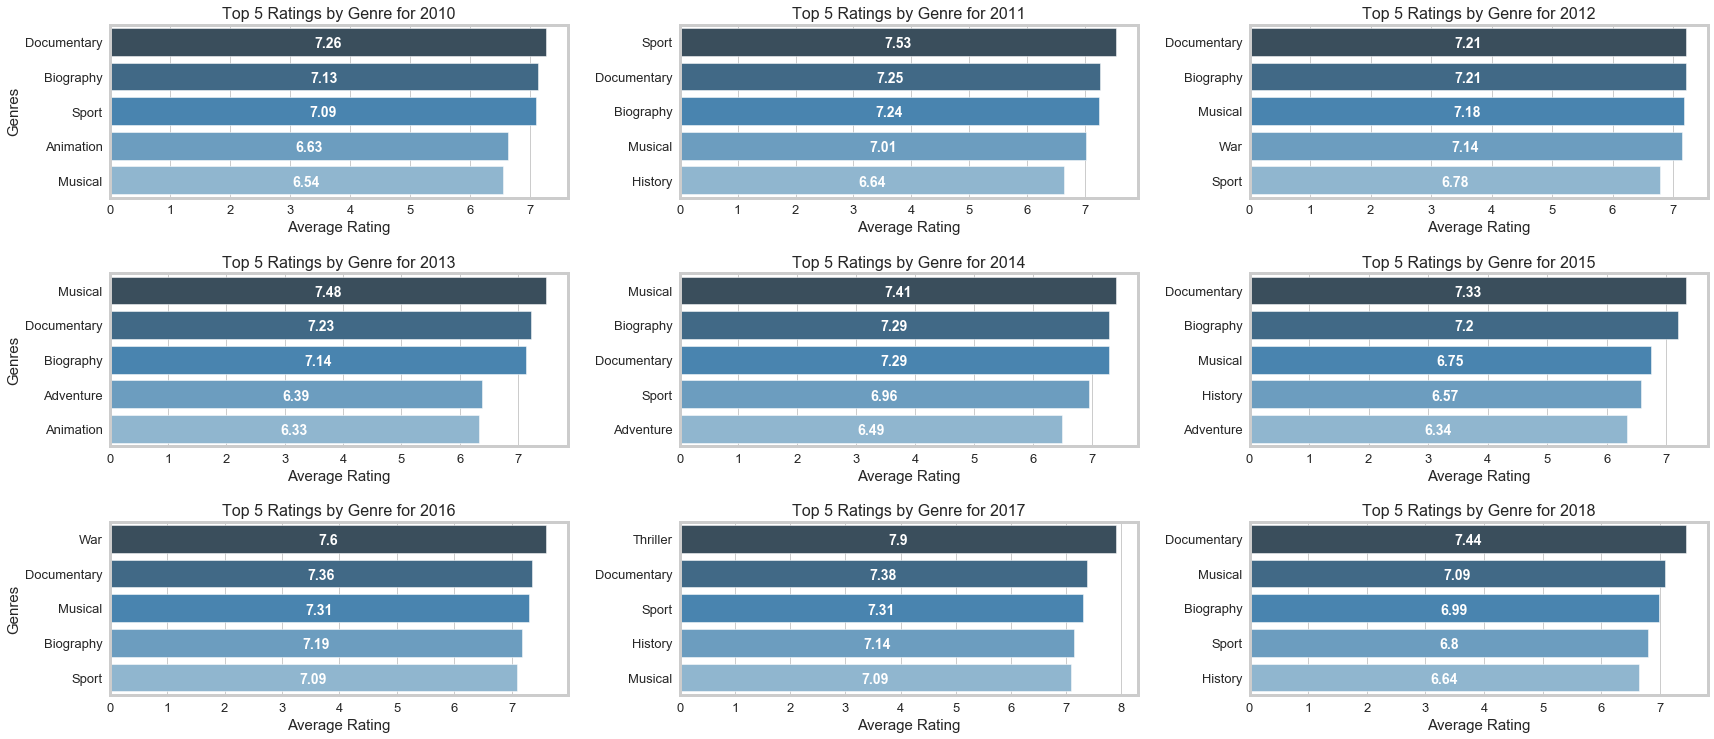

In [1305]:
sns.set_style("whitegrid")# setting style 
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(23,10)) #setting figure 
fig.tight_layout(h_pad=4,w_pad=6)

for i in range(1,10): #creating loop for the 9 plots 
    row = (i-1)//3
    col = i%3-1
    ax = axes[row][col]
    sns.barplot(x="averagerating", y="prime_genre",data=frame_prime[frame_prime["year"] == year_list[i]][0:5], orient="h", ax=ax, palette="Blues_d")
    ax.set_title("Top 5 Ratings by Genre for {}".format(year_list[i]), fontdict = {"size":16})
    ax.set_ylabel(None)
    for x in range(0,3):
        axes[x][0].set_ylabel("Genres",fontdict={"size":15})
    ax.set_xlabel("Average Rating",fontdict={"size":15})
    ax.tick_params(labelsize=13)
    for v, r in enumerate(frame_prime[frame_prime["year"] == year_list[i]][0:5]["averagerating"]): # adding labels to data 
        ax.text(r/2, v+.160, r, color="white", fontweight="bold", ha="center")

<div style="border:0.2px; border-style:solid; border-color:#A9A9A9; padding: 0.5em;font-size:14px;border-width:medium;">
With 21 total genres and ratings that are marginally close, to gain insight using average ratings as a ruberic we will need to set paramters for the data we analyze. In this case I have set the limit to 5 top genres for each year.
</div>

In [1563]:
count_genre = {}
for i in frame_prime["prime_genre"].unique():
    count_genre[i] = 0
    
for x in range(1,10):
    for i in frame_prime[frame_prime["year"] == year_list[x]]["prime_genre"][0:5]:
        if i in count_genre:
            count_genre[i] += 1

In [1564]:
print(count_genre)

{'Documentary': 9, 'Musical': 9, 'Biography': 8, 'Sport': 7, 'History': 4, 'Drama': 0, 'Adventure': 3, 'Family': 0, 'Romance': 0, 'Crime': 0, 'Comedy': 0, 'Mystery': 0, 'Animation': 2, 'War': 2, 'Action': 0, 'Fantasy': 0, 'Western': 0, 'Sci-Fi': 0, 'Horror': 0, 'Thriller': 1, 'Adult': 0}


In [1565]:
# creating dataframe for easy plotting 
genre_frame = pd.DataFrame(list(count_genre.items()),columns=["prime_genre","count"])
genre_frame.head()

,prime_genre,count
0,Documentary,9
1,Musical,9
2,Biography,8
3,Sport,7
4,History,4


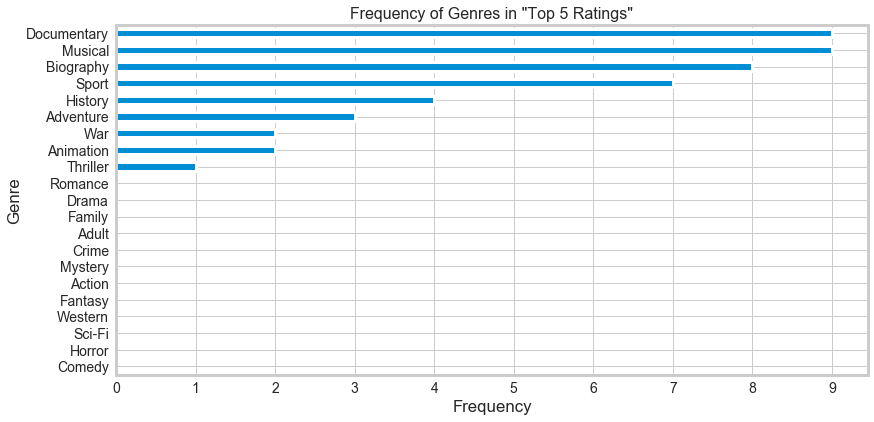

In [1566]:
# creating plot and visualization specifications
fig, axes = plt.subplots(figsize=(12,6)) 

genre_frame.sort_values("count").plot(kind="barh", x="prime_genre", y="count", ax=axes, lw=3)
plt.title('Frequency of Genres in "Top 5 Ratings"', fontsize=16)
plt.xticks(list(range(0,10)), fontsize=14) 
plt.yticks(fontsize=14)
plt.ylabel("Genre")
plt.xlabel("Frequency")
plt.legend().remove()
plt.show()

<div style="border:0.2px; border-style:solid; border-color:#A9A9A9; padding: 0.5em;font-size:14px;border-width:medium;">
Here we are able to further grasp what movies have the best performance based on ratings.<br>

</div>

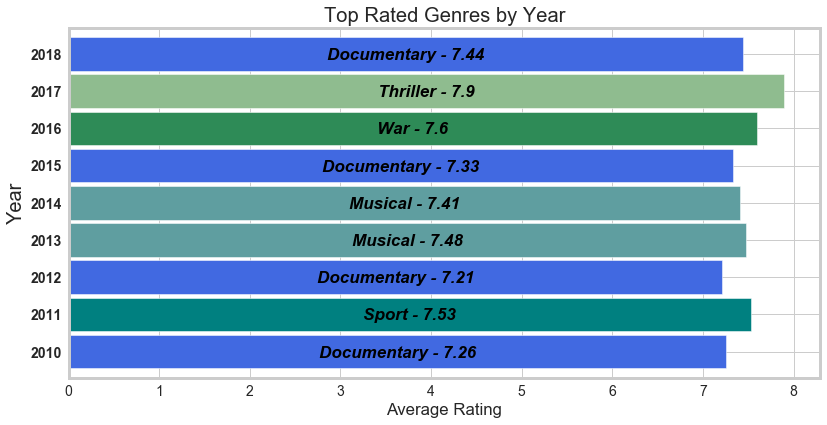

In [1381]:
fig, axes = plt.subplots(figsize=(12,6)) 
col = ["royalblue","teal","royalblue","cadetblue","cadetblue","royalblue","seagreen","darkseagreen","royalblue"]

top_ratings.sort_values("year", ascending=False).sort_values("year", ascending=True).plot(kind="barh", x="year", y="averagerating", ax=axes, width=.9, color=col)
axes.set_title("Top Rated Genres by Year")
axes.set_ylabel("Year", fontdict={"size":20})
axes.set_xlabel("Average Rating")
plt.yticks(fontsize=14, fontweight="bold")
plt.xticks(fontsize=14)
plt.legend().remove()
for i, x in enumerate(top_ratings["prime_genre"]):
    axes.text(top_ratings["averagerating"].iloc[i]/2, i-.15,x +" - {}".format(top_ratings["averagerating"].iloc[i]),fontdict={"size":17,"weight":"bold","style":"italic"}, ha="center", color="black") #adding label to data

<div style="border:0.2px; border-style:solid; border-color:#A9A9A9; padding: 0.5em;font-size:14px;border-width:medium;">

</div>

In [1576]:
df_movie.head()

,title,original_title,year,runtime_minutes,genres,averagerating,numvotes,id,release_date,production_budget,domestic_gross,worldwide_gross,hours,prime_genre
0,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77.0,NaN,NaN,NaN,NaN,NaN,2.9,Action
2,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517.0,NaN,NaN,NaN,NaN,NaN,2.0,Drama
3,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13.0,NaN,NaN,NaN,NaN,NaN,NaN,Comedy
4,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119.0,NaN,NaN,NaN,NaN,NaN,1.3,Comedy
5,A Thin Life,A Thin Life,2018,75.0,Comedy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.2,Comedy


<p style="border:0.2px; border-style:solid; border-color:#A9A9A9; padding: 0.5em;font-size:14px;border-width:medium; text-align:center;">  
Conclusion
 </p>

<div>
    <div style="border:0.2px; border-style:solid; border-color:#1C6EA4; padding: 1em;font-size:15px;border-width:medium;display:inline-block; margin-left:50px;">
     <h2> Questions</h2> 
           <ul>
        <li>Question 1: what movies are most popular?
        <li>Question 2: what movie kind of movies are most succesful?
        <li>Question 3: What kind of movies produce the most revenue? 
</ul>
   </div>
</div>

Question 1: what kind of movies are predominatly produced? 